# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('telcoduplic.csv')

In [2]:
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly Charges,Total Charges,Churn
0,0002-ORFBO,0,0,1,1,3,1,0,1,0,...,0,1,1,0,1,1,3,4,2,0
1,0003-MKNFE,1,0,0,0,3,1,1,1,0,...,0,0,0,1,0,0,3,5,2,0
2,0004-TLHLJ,1,0,0,0,6,1,0,0,0,...,1,0,0,0,0,1,2,6,5,1
3,0011-IGKFF,1,1,1,0,6,1,0,0,0,...,1,0,1,1,0,1,2,6,4,1
4,0013-EXCHZ,0,1,1,0,6,1,0,0,0,...,0,1,1,0,0,1,3,6,5,1
5,0013-MHZWF,0,0,0,1,3,1,0,1,0,...,0,1,1,1,0,1,1,4,2,0
6,0013-SMEOE,0,1,1,0,1,1,0,0,1,...,1,1,1,1,2,1,0,1,2,0
7,0014-BMAQU,1,0,1,0,1,1,1,0,1,...,0,1,0,0,2,1,1,1,2,0
8,0015-UOCOJ,0,1,0,0,4,1,0,1,1,...,0,0,0,0,0,1,2,5,3,0
9,0016-QLJIS,0,0,1,1,1,1,1,1,1,...,1,1,1,1,2,1,3,1,2,0


### Getting the inputs and output

In [3]:
import numpy as np

# Set print options to display integers and avoid scientific notation
np.set_printoptions(precision=0, suppress=True, formatter={'all': '{:,.0f}'.format})

In [4]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [5]:
X

array([[0, 0, 1, ..., 3, 4, 2],
       [1, 0, 0, ..., 3, 5, 2],
       [1, 0, 0, ..., 2, 6, 5],
       ...,
       [1, 0, 0, ..., 3, 5, 3],
       [1, 0, 1, ..., 3, 1, 2],
       [1, 0, 1, ..., 2, 1, 2]])

In [6]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Creating the Training Set and the Test Set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
X_train

array([[1, 0, 0, ..., 2, 4, 2],
       [0, 0, 1, ..., 3, 6, 5],
       [0, 0, 0, ..., 2, 6, 4],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [1, 0, 0, ..., 0, 5, 3],
       [1, 0, 1, ..., 0, 1, 2]])

In [9]:
X_test

array([[1, 0, 1, ..., 2, 1, 2],
       [1, 0, 0, ..., 2, 7, 5],
       [1, 0, 0, ..., 1, 4, 2],
       ...,
       [0, 0, 0, ..., 0, 4, 2],
       [1, 0, 1, ..., 1, 3, 2],
       [0, 0, 1, ..., 2, 1, 2]])

In [10]:
y_train

array([0, 1, 1, ..., 0, 0, 0])

In [11]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [13]:
X_train

array([[1, -0, -1, ..., 0, 0, -1],
       [-1, -0, 1, ..., 1, 1, 2],
       [-1, -0, -1, ..., 0, 1, 1],
       ...,
       [-1, -0, -1, ..., 0, -1, -1],
       [1, -0, -1, ..., -1, 1, 0],
       [1, -0, 1, ..., -1, -1, -1]])

## Part 2 - Building and training the model

### Building the model

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [15]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [16]:
y_pred = model.predict(sc.transform(X_test))

In [17]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [26]:

model.predict(sc.transform([[0,0,1,1,6,1,0,2,2,2,2,2,2,2,0,0,3,7,6]]))


array([1])

## Part 3: Evaluating the model 

### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[1,044, 1],
       [0, 364]])

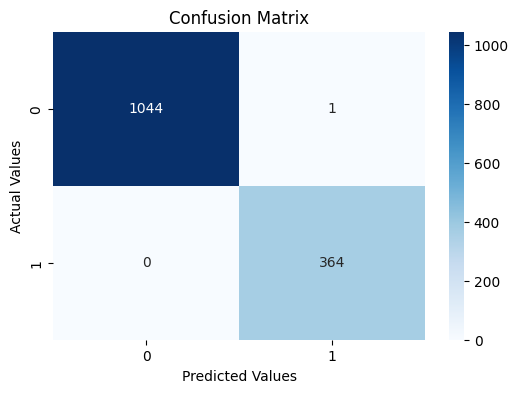

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


### Accuracy

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9992902767920511